<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = sns.load_dataset('titanic')
VARS = ['pclass','sex','age','sibsp','parch','fare']
TARGET = ['survived']

x = data[VARS]
y = data[TARGET]

In [ ]:
### Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)
print(x_train.shape)
print(x_test.shape)

(712, 6)
(179, 6)


In [ ]:
### Análisis exploratorio de variables

##### Valores nulos o en blanco
x_train.isna().mean() ###Porcentaje de valores nulos por columna

pclass    0.000000
sex       0.000000
age       0.207865
sibsp     0.000000
parch     0.000000
fare      0.000000
dtype: float64

In [ ]:
#### Imputación de valores en blanco

media_edad = np.mean(x_train['age'])
mediana_edad = np.nanmedian(x_train['age'])

x_train['age_media'] = x_train['age'].fillna(media_edad)
x_train['age_mediana'] = x_train['age'].fillna(mediana_edad)
x_test['age_media'] = x_test['age'].fillna(media_edad)
x_test['age_mediana'] = x_test['age'].fillna(mediana_edad)

In [ ]:
#### Otros métodos de imputación

from sklearn.impute import KNNImputer

imputer = KNNImputer()
x_train['age_knn'] = imputer.fit_transform(x_train[['pclass','fare','age']])[:,2]
x_test['age_knn'] = imputer.transform(x_test[['pclass','fare','age']])[:,2]

In [ ]:
#### Algo más
##### Manejo de variables categóricas

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()


x_train[enc.get_feature_names_out()[0]] = enc.fit_transform(x_train[['sex']]).toarray()[:,0]
x_train[enc.get_feature_names_out()[1]] = enc.fit_transform(x_train[['sex']]).toarray()[:,1]

x_test[enc.get_feature_names_out()[0]] = enc.transform(x_test[['sex']]).toarray()[:,0]
x_test[enc.get_feature_names_out()[1]] = enc.transform(x_test[['sex']]).toarray()[:,1]

In [ ]:
x_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'age_media',
       'age_mediana', 'age_knn', 'sex_female', 'sex_male'],
      dtype='object')

In [ ]:
#### Escalamiento de datos en caso de algoritmos de distancia

from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
x_train_esc =pd.DataFrame(esc.fit_transform(x_train[['pclass','age','sibsp','parch','fare','age_media','age_mediana','age_knn','sex_female','sex_male']]),
                          columns = ['pclass','age','sibsp','parch','fare','age_media','age_mediana','age_knn','sex_female','sex_male'],
                          index = x_train.index)

x_test_esc =pd.DataFrame(esc.transform(x_test[['pclass','age','sibsp','parch','fare','age_media','age_mediana','age_knn','sex_female','sex_male']]),
                          columns = ['pclass','age','sibsp','parch','fare','age_media','age_mediana','age_knn','sex_female','sex_male'],
                          index = x_test.index)

In [ ]:
#### Regresión logística

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

modelo_rl = LogisticRegression()
modelo_rl_mediana = LogisticRegression()
modelo_svm = SVC(probability = True)

modelo_rl.fit(x_train[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']], y_train)
modelo_rl_mediana.fit(x_train[['pclass','sibsp','parch','fare','age_mediana','sex_female','sex_male']], y_train)
modelo_svm.fit(x_train[['pclass','sibsp','parch','fare','age_knn','sex_female','sex_male']], y_train)


preds = modelo_rl.predict(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])
preds_mediana = modelo_rl_mediana.predict(x_test[['pclass','sibsp','parch','fare','age_mediana','sex_female','sex_male']])
preds_svm = modelo_svm.predict(x_test[['pclass','sibsp','parch','fare','age_knn','sex_female','sex_male']])

preds_proba = modelo_rl.predict_proba(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])
preds_proba_mediana = modelo_rl_mediana.predict_proba(x_test[['pclass','sibsp','parch','fare','age_mediana','sex_female','sex_male']])
preds_proba_svm = modelo_svm.predict_proba(x_test[['pclass','sibsp','parch','fare','age_knn','sex_female','sex_male']])


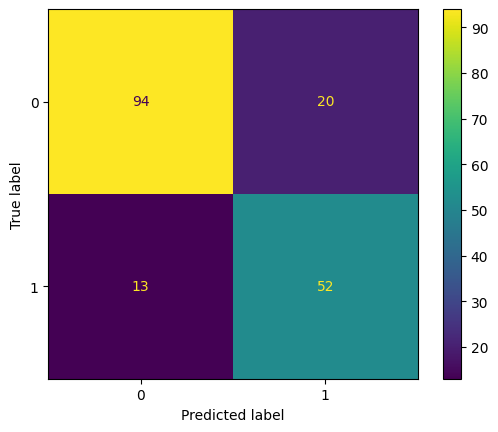

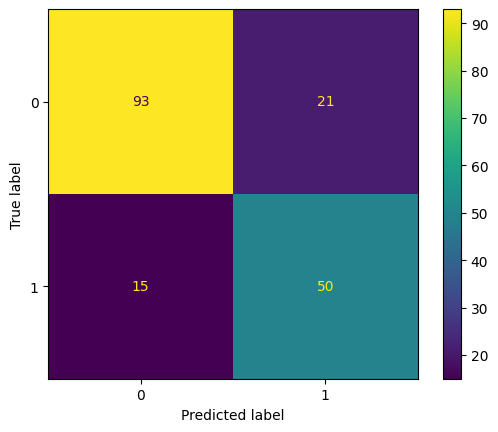

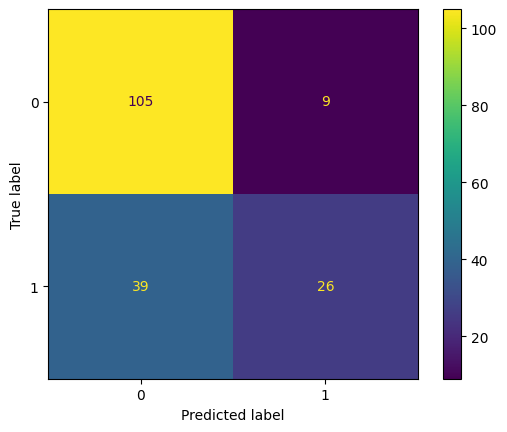

In [ ]:
#### Evaluar al modelo

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, roc_auc_score, roc_curve, auc

cm_rl = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(cm_rl)

cm_rl_mediana = confusion_matrix(y_test, preds_mediana)
disp_mediana = ConfusionMatrixDisplay(cm_rl_mediana)

cm_svm = confusion_matrix(y_test, preds_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)


disp.plot()
disp_mediana.plot()
disp_svm.plot()
plt.show()

In [ ]:
### Accuracy

print('Accuracy:',(94+52)/(94+20+13+52)) ##### Total de valores predichos correctamente sobre total de valores
print('Accuracy Mediana:',(93+50)/(93+21+15+50)) ##### Total de valores predichos correctamente sobre total de valores
print('Sensibilidad:', 52/(52+13))#### Qué tan bueno es el modelo prediciendo positivos
print('Especificidad:',94/(94+20))#### Qué tan bueno es el modelo prediciendo negativos
print('Accuracy:',accuracy_score(y_test, preds))
print('Sensibilidad:', recall_score(y_test, preds, pos_label = 1))
print('Especificidad:', recall_score(y_test, preds, pos_label = 0))

Accuracy: 0.8156424581005587
Accuracy Mediana: 0.7988826815642458
Sensibilidad: 0.8
Especificidad: 0.8245614035087719
Accuracy: 0.8156424581005587
Sensibilidad: 0.8
Especificidad: 0.8245614035087719


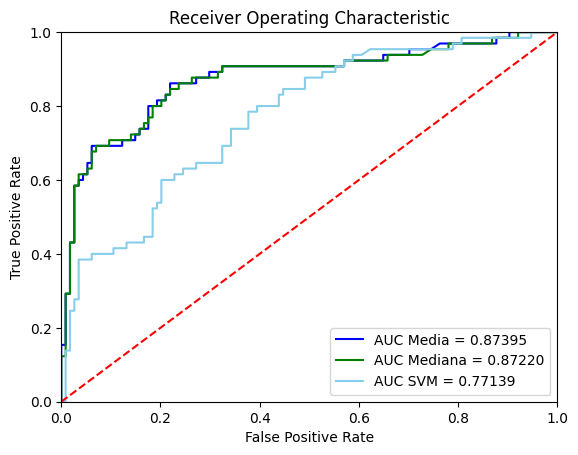

In [ ]:
### AUC y Curva ROC


probas = preds_proba[:,1]
probas_mediana = preds_proba_mediana[:,1]
probas_svm = preds_proba_svm[:,1]
fpr, tpr, threshold = roc_curve(y_test, probas)
fpr_mediana, tpr_mediana, threshold_mediana = roc_curve(y_test, probas_mediana)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, probas_svm)
roc_auc = auc(fpr, tpr)
roc_auc_mediana = auc(fpr_mediana, tpr_mediana)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC Media = %0.5f' % roc_auc)
plt.plot(fpr_mediana, tpr_mediana, 'g', label = 'AUC Mediana = %0.5f' % roc_auc_mediana)
plt.plot(fpr_svm, tpr_svm, 'skyblue', label = 'AUC SVM = %0.5f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators = 500)
modelo_rf.fit(x_train[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']], y_train)
preds_rf = modelo_rf.predict(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])
preds_probas_rf = modelo_rf.predict_proba(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])

In [ ]:
### Boosting

from sklearn.ensemble import GradientBoostingClassifier

modelo_boosting = GradientBoostingClassifier()
modelo_boosting.fit(x_train[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']], y_train)
preds_boosting = modelo_boosting.predict(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])
preds_probas_boosting = modelo_boosting.predict_proba(x_test[['pclass','sibsp','parch','fare','age_media','sex_female','sex_male']])

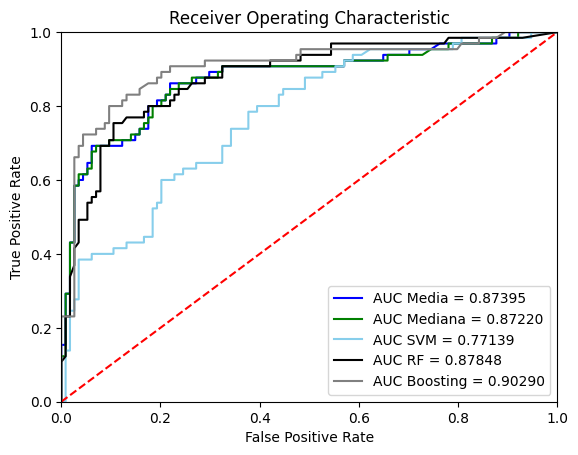

In [ ]:

probas = preds_proba[:,1]
probas_mediana = preds_proba_mediana[:,1]
probas_svm = preds_proba_svm[:,1]
probas_rf = preds_probas_rf[:,1]
probas_boosting = preds_probas_boosting[:,1]

fpr, tpr, threshold = roc_curve(y_test, probas)
fpr_mediana, tpr_mediana, threshold_mediana = roc_curve(y_test, probas_mediana)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, probas_svm)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, probas_rf)
fpr_boosting, tpr_boosting, threshold_boosting = roc_curve(y_test, probas_boosting)

roc_auc = auc(fpr, tpr)
roc_auc_mediana = auc(fpr_mediana, tpr_mediana)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_boosting = auc(fpr_boosting, tpr_boosting)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC Media = %0.5f' % roc_auc)
plt.plot(fpr_mediana, tpr_mediana, 'g', label = 'AUC Mediana = %0.5f' % roc_auc_mediana)
plt.plot(fpr_svm, tpr_svm, 'skyblue', label = 'AUC SVM = %0.5f' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, 'black', label = 'AUC RF = %0.5f' % roc_auc_rf)
plt.plot(fpr_boosting, tpr_boosting, 'gray', label = 'AUC Boosting = %0.5f' % roc_auc_boosting)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()